In [ ]:
import numpy as np
import copy
import time
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction
from math import factorial
from google.colab import files
import csv

#Собираем всего и сразу нужного из старых домашек

In [ ]:
def good_output(a: list, approx = False) -> None:
    "Привычный вывод матрицы"
    if (approx):
        for row in a:
            print(*[eval(str(el)) for el in row])
    else:
        for row in a:
            print(*row)

def sum_of_matrix(a1:list, a2:list) -> list:
    "Return sum of matrixes or ERROR-message"
    ans = copy.deepcopy(a1)

    if (len(a1) != len(a2)):
        return 'ERROR: dimension error'

    for i in range(len(a1)):
        if (len(a1[i]) != len(a2[i])):
            return 'ERROR: dimension error'
        for j in range(len(a1[i])):
            ans[i][j] += a2[i][j]


    return ans

def mul_by_number(matrix:list, coef:complex) -> list:
    "Return matrix multiplied by coef"
    ans = copy.deepcopy(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            ans[i][j] *= coef

    return ans

def multiply_matrix(a1:list, a2:list) -> list:
    "Return matrix multiplied by other or an ERROR-message"
    if (len(a1[0]) != len(a2)):
        return 'ERROR: dimension error'

    ans = [[0 for i in range(len(a1))] for j in range(len(a2[0]))]

    for i in range(len(a1)):
        for j in range(len(a2[0])):
            for cnt in range(len(a1[0])):
                ans[i][j] += a1[i][cnt] * a2[cnt][j]

    return ans



def determinant(matrix:list) -> complex:
    "Return det(matrix)"
    if (len(matrix) != len(matrix[0])):
        return 'ERROR: non-square matrix'

    if (len(matrix) == 1):
        return matrix[0][0]

    ans = 0
    sign = 1
    for i in range(len(matrix)):
        adding_matrix = list(zip(*matrix[1:]))
        adding_matrix.pop(i)
        adding_matrix = list(zip(*adding_matrix))
        ans += sign * matrix[0][i] * determinant(adding_matrix)
        sign *= -1
    return ans




def transpose(matrix:list) -> list:
    "Return transposed matrix" #доп память
    return [[matrix[j][i] for j in range(len(matrix))]
            for i in range(len(matrix[0])) ]


def adjugate_matrix(matrix: list) -> list:
    ans = [[0 for i in range(len(matrix))] for j in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            minor = copy.deepcopy(matrix)
            
            minor.pop(i)
            minor = list(zip(*minor))

            minor.pop(j)
            minor = list(zip(*minor))
            ans[i][j] = (-1) ** (i + j) * determinant(minor)


    return transpose(ans)

def invertible_matrix(matrix: list) -> list:
    print(matrix)
    if (determinant(matrix) == 0):
        return np.full((len(matrix), len(matrix)), 1000000000)
    return mul_by_number(adjugate_matrix(matrix), 1 / determinant(matrix))

def get_norm_inf(matrix:list) -> complex:
    ans = sum([abs(el) for el in matrix[0]])
    for i in range(1, len(matrix)):
        ans = max(ans, sum([abs(el) for el in matrix[0]]))

    return ans

def get_norm_2(matrix) -> complex:
    s = 0
    for row in matrix:
        for el in row:
            s += el ** 2
    return s ** 0.5

def get_cond(matrix: list) -> complex:
    a_inv = invertible_matrix(matrix)
    if (type(a_inv) != type('s')):
        cond = get_norm_inf(matrix) * get_norm_inf(a_inv)
        return cond
    else:
        return 10000000000000000

def input_for_user() -> list:
    "Interaction with user. Input matrix"
    n = int(input('Введите размерность матрицы, n: '))
    while (n < 1):
        print('Ай эм вери сори, бат 0 из нот гоинг то ворк, репит плиз')
        n = int(input('Введите размерность матрицы: '))
        
    m = int(input('Введите размерность матрицы m: '))
    type_of_data_chosen =(
     input('Выберите нужный вам тип данных: i - int, f - float, c - complex, fr - fraction: '))
    type_of_data = ['int', 'float', 'complex', 'Fraction']
    if (type_of_data_chosen == 'i'):
        type_of_data_chosen = '0'
    if (type_of_data_chosen == 'f'):
        type_of_data_chosen = '1'
    if (type_of_data_chosen == 'c'):
        type_of_data_chosen = '2'
    if (type_of_data_chosen == 'fr'):
        type_of_data_chosen = '3'

    users_data = [[0 for j in range(m)] for i in range(n)]
    #print(users_data)

    type_of_data_chosen = int(type_of_data_chosen)
    print('Вводите числа матрицы по одному')
    for i in range(n):
        for j in range(m):
            el = input()
            el = el.replace('i', 'j')
            el = el.replace(' ', '')
            if (el[-1] != 'j'):
                el1 = ''
                for q in range(len(el)):
                    if (el[q] == 'j'):
                        el1 = el[q+1:] + '+' + el[:q+1]
                if (el1 != ''):
                    el = el1
            el = get_fr(el)
            number = eval(type_of_data[type_of_data_chosen])(el)
            #print(i, j, number)
            users_data[i][j] = number

    return users_data


In [ ]:
def Gauss_Jordan(coefs, results):
    #getting coefs|identity|res
    working_matrix = [coefs[j] + [0 for i in range(len(coefs))]
                      + [results[j]] for j in range(len(coefs))]
    for i in range(len(coefs)):
        working_matrix[i][i +  len(coefs)] = 1

    #going to identity|inverible|answer
    for row in range(len(working_matrix)):
        for i in range(row + 1, len(working_matrix)):
            if (working_matrix[row][row] != 0):
                for j in range(row + 1, len(working_matrix[0])):
                    working_matrix[i][j] -= (working_matrix[row][j] 
                    * working_matrix[i][row] / working_matrix[row][row])
                working_matrix[i][row] = 0
                


    for row in range(len(working_matrix) - 1, -1, -1):
        if (working_matrix[row][row] != 0):
            for j in range(row + 1, len(working_matrix[0])):
                working_matrix[row][j] /= working_matrix[row][row]
            working_matrix[row][row] = 1
            for i in range(row):
                for j in range(row + 1, len(working_matrix[0])):
                    working_matrix[i][j] -= (working_matrix[row][j]
                                             * working_matrix[i][row])
                working_matrix[i][row] = 0



    return [coefs, 
            [[working_matrix[i][j + len(working_matrix)] for j in range(len(working_matrix))] 
             for i in range(len(working_matrix))],
             [working_matrix[i][-1] for i in range(len(working_matrix))]]

def Gauss_Jordan_Fraction(coefs, results):
    for i in range(len(coefs)):
        for j in range(len(coefs[0])):
            if (type(coefs[i][j]) != complex):
                coefs[i][j] = Fraction(str(coefs[i][j]))
        if (type(results[i]) != complex):
                results[i] = Fraction(str(results[i]))
        
    return Gauss_Jordan(coefs, results)
   
    

#Обработка функций

In [ ]:
def f(a1, x):
    ans = 0
    for i in range(len(a1)):
        ans += a1[i] * x ** i
    return ans

def func_normal(x, a, b, c):
    return a * exp(-(x-b)**2/c**2)

def get_str(a1):
    ans = 'f(x) = '
    for i in range(len(a1) - 1, -1, -1):
        if (a1[i] != 0):
            if (a1[i] > 0 and i != len(a1) - 1):
                ans+= ' + '
            ans += str(a1[i])
            if (i >= 1):
                ans += 'x'
            if (i >= 2):
                ans += '^'+str(i)

    return ans

    
def get_disp(y, y1):
    sum = 0
    for i in range(len(y)):
        sum += (y[i] - y1[i]) ** 2

    return float(sum)

#Интерполяция методом Лагранжа

In [ ]:
def inter_Lagrange(file_name):
    df = pd.read_csv(file_name, sep = ',', header=None)
    X = list(df[0])
    Y = list(df[1]) 

    x = Symbol('x')
    num = [1 for _ in range(len(X))]
    den = [1 for _ in range(len(X))]
    
    for i in range(len(X)):
        for j in range(len(X)):
            if (i != j):
                den[i] *= X[i] - X[j]
        for j in range(len(X)):
            if (i != j):
                num[i] *= eval('x') - X[j]
        num[i] *= Y[i]

    answer = 0
    for i in range(len(X)):
        answer += num[i]/den[i] 
    poly = lambdify(x, answer)
    return [
            [[X[i], Y[i], poly(X[i])] for i in range(len(X))], 
            expand(answer)]

#Интерполяция методом Ньютона

In [ ]:
def inter_Newton_forward(file_name):
    df = pd.read_csv(file_name, sep = ',', header=None)
    X = list(df[0])
    Y = list(df[1])
    x = Symbol('x')

    h = X[1] - X[0]
    d_y = [copy.deepcopy(Y)]


    while (len(d_y[-1]) > 1):
        d_y.append([d_y[-1][i] - d_y[-1][i - 1] for i in range(1, len(d_y[-1]))])

    d_x = 1
    answer = Y[0]
    for i in range(1, len(d_y)):
        d_x *= eval('x') - X[i - 1]
        answer += (d_y[i][0] / pow(h, i) / factorial(i) * d_x)

    poly = lambdify(x, answer)

    return [[[X[i], Y[i], poly(X[i])] for i in range(len(X))], 
            expand(answer)]

In [ ]:
def inter_Newton_back(file_name):
    df = pd.read_csv(file_name, sep = ',', header=None)
    X = list(df[0])
    Y = list(df[1])

    x = Symbol('x')

    h = X[-1] - X[-2]

    d_y = [copy.deepcopy(Y)]
    while (len(d_y[-1]) > 1):
        d_y.append([d_y[-1][i] - d_y[-1][i - 1] for i in range(1, len(d_y[-1]))])
    
    d_x = 1
    answer = Y[-1]

    for i in range(1, len(d_y)):
        d_x *= eval('x') - X[len(X) - i]
        answer += d_y[i][-1] / pow(h, i) / factorial(i) * d_x


    poly = lambdify(x, answer)
    
    return [[[X[i], Y[i], poly(X[i])] for i in range(len(X))], 
            expand(answer)]    

#Аппроксимация линейной функцией


In [ ]:
def approx_linear(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    ans = (Gauss_Jordan_Fraction
                ([[sum([el ** 2 for el in x]), sum(x)], [sum(x), len(x)]], 
                [sum([x[i]*y[i] for i in range(len(x))]), sum(y)]))
    
    ans = ans[-1][::-1]
    for i in range(len(ans)):
        ans[i] = float(ans[i])
    return [[[float(x[i]), float(y[i]), f(ans, x[i])] for i in range(len(x))], 
            get_str(ans),
           get_disp(y, [f(ans, el) for el in x])]

#Аппроксимация квадратичной функцией

In [ ]:
def approx_square(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    ans = (Gauss_Jordan_Fraction
                (
                    [[sum([el ** 4 for el in x]), sum(el ** 3 for el in x), sum(el ** 2 for el in x)], 
                     [sum([el ** 3 for el in x]), sum(el ** 2 for el in x), sum(el for el in x)], 
                     [sum([el ** 2 for el in x]), sum(el for el in x), len(x)]],
                    [sum([x[i] ** 2 * y[i] for i in range(len(x))]), 
                     sum([x[i] * y[i] for i in range(len(x))]),
                     sum(y)]
                )[-1][::-1])
    for i in range(len(ans)):
        ans[i] = float(ans[i])
    return [[[float(x[i]), float(y[i]), f(ans, x[i])] for i in range(len(x))], 
            get_str(ans),
            get_disp(y, [f(ans, el) for el in x])]

#Аппроксимация нормальное распределение


In [ ]:
from math import log
from math import exp

def approx_normal(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    if not(all([el > 0 for el in y]) or all([el < 0 for el in y])):
        return [[[0, 0, 0]], 'not applyable', 1000000000]
    sign = 1
    if (y[0] < 0):
        sign = -1
    y1 = [log(el * sign) for el in y]
    ans = (Gauss_Jordan_Fraction
                (
                    [[sum([el ** 4 for el in x]), sum(el ** 3 for el in x), sum(el ** 2 for el in x)], 
                     [sum([el ** 3 for el in x]), sum(el ** 2 for el in x), sum(el for el in x)], 
                     [sum([el ** 2 for el in x]), sum(el for el in x), len(x)]],
                    [sum([x[i] ** 2 * y1[i] for i in range(len(x))]), 
                     sum([x[i] * y1[i] for i in range(len(x))]),
                     sum(y1)]
                )[-1][::-1])
    
    for i in range(len(ans)):
        ans[i] = float(ans[i])
        
    
    c = (-1 / ans[2]) ** 0.5
    if (type(c) == complex):
        return [[[0, 0, 0]], 'not applyable', 1000000000]

    b = ans[1] * c ** 2 / 2
    a = exp(ans[0] + b ** 2 / c ** 2) * sign

    return [
            [[x[i], y[i], func_normal(x[i], a, b, c)] for i in range(len(x))],
            'f(x) = ' + str(a) + 'exp(-(x - ('+ str(b) +'))^2/' + str(c) + '^2)',
            get_disp(y, [func_normal(x[i], a, b, c) for i in range(len(x))])
    ]

#Кусочная аппроксимация

In [ ]:
def multiple_approx(x, y):
    n = len(y)
    y_helper = [[i, y[i]] for i in range(n)]
    y_helper.sort(key = lambda x: x[1], reverse = True)
    indexes = []
    ans = []
    indexes.append(0)
    indexes.append(n - 1)

    for el in y_helper:
        if (len(indexes) <= n // 100):
            able_to_add = True
            for t in indexes:
                if (abs(el[0] - t) <= n // 30):
                    able_to_add = False
            if (able_to_add):
                indexes.append(el[0])


    indexes = sorted(indexes)
    print(indexes)
    for i in range(len(indexes) - 1):
        x_t = x[indexes[i] : indexes[i + 1]]
        y_t = y[indexes[i] : indexes[i + 1]]
        ans_l = approx_linear('a', x_t, y_t)
        ans_s = approx_square('a', x_t, y_t)
        ans_n = approx_normal('a', x_t, y_t)
        if (ans_l[-1] <= ans_s[-1] and ans_l[-1] <= ans_n[-1]):
            ans.extend(ans_l[0])
        elif (ans_s[-1] <= ans_l[-1] and ans_s[-1] <= ans_n[-1]):
            ans.extend(ans_s[0])
        else:
            ans.extend(ans_n[0])
    return [ans, indexes]

#Проверочка


Text(0.5, 1.0, 'Аппроксимация. Встроенная')

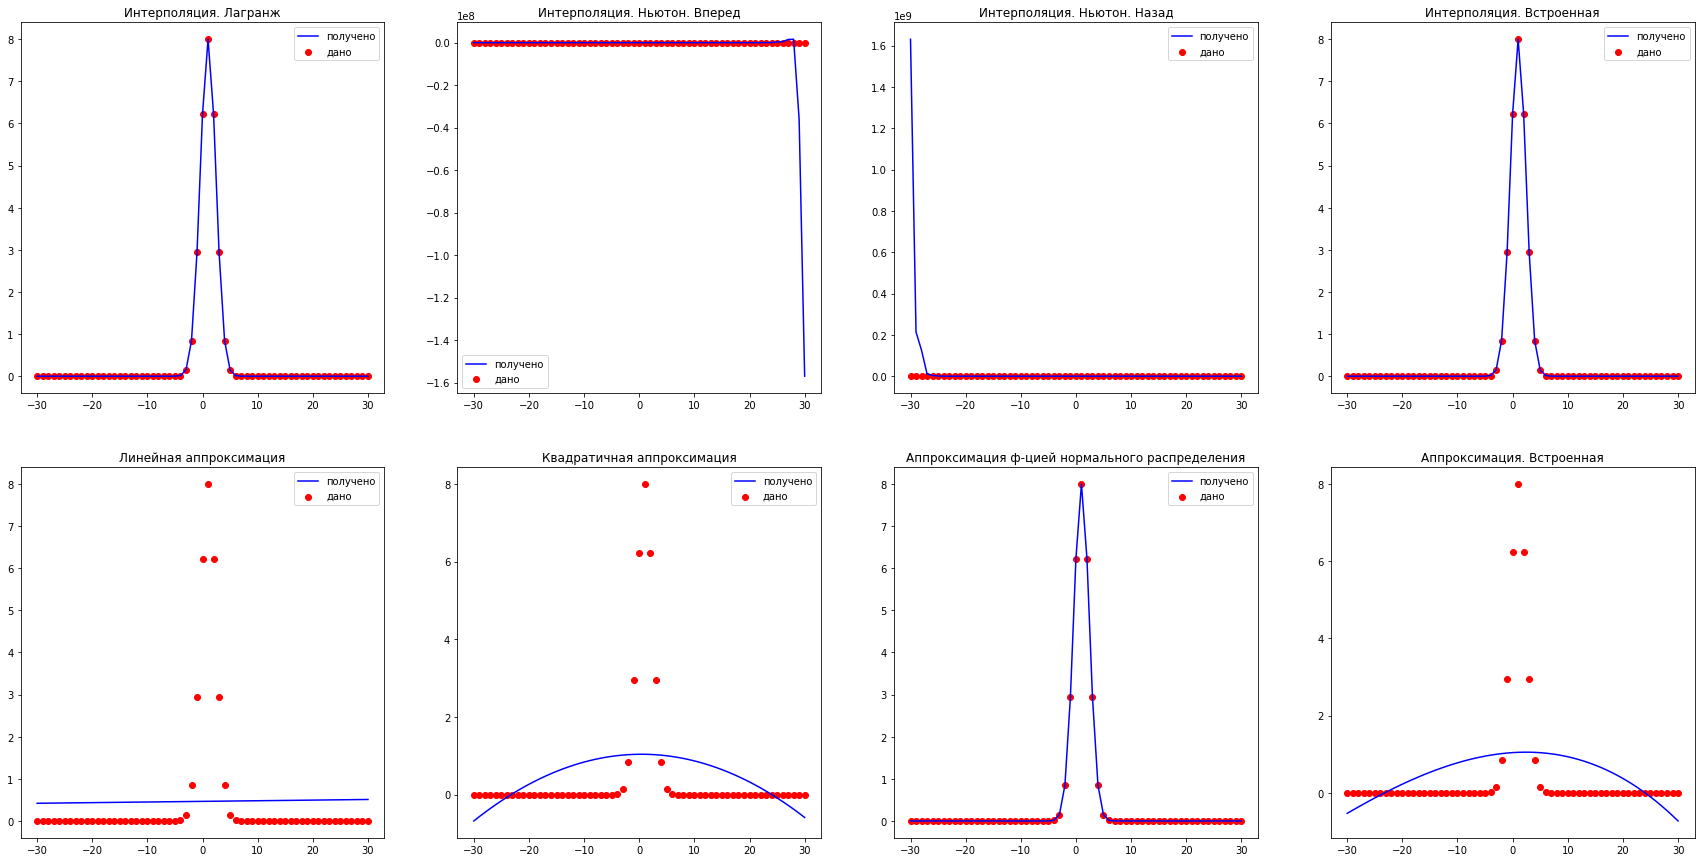

In [ ]:
fn = 'data1.csv'
plt.figure(figsize = (30, 15))
plt.subplot(2, 4, 1)

t = inter_Lagrange(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Интерполяция. Лагранж')

plt.subplot(2, 4, 2)

t = inter_Newton_forward(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Интерполяция. Ньютон. Вперед')

plt.subplot(2, 4, 3)

t = inter_Newton_back(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Интерполяция. Ньютон. Назад')

plt.subplot(2, 4, 4)

df = pd.read_csv(fn, sep = ',', header=None)
x = list(df[0])
y = list(df[1])
y0 = np.interp(x, x, y)

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Интерполяция. Встроенная')



plt.subplot(2, 4, 5)

t = approx_linear(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Линейная аппроксимация')


plt.subplot(2, 4, 6)

t = approx_square(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Квадратичная аппроксимация')


plt.subplot(2, 4, 7)

t = approx_normal(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.legend(['получено', 'дано'])
plt.title('Аппроксимация ф-цией нормального распределения')

plt.subplot(2, 4, 8)

df = pd.read_csv(fn, sep = ',', header=None)
x = list(df[0])
y0 = list(df[1])
poly = np.poly1d(np.polyfit(x, y0, deg = 3))
y = [poly(el) for el in x] 

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.title('Аппроксимация. Встроенная')

[-0.07438353453087504, -0.06295420242644646, 0.020414496681416854, -0.03007987283798702, -0.05176604250197625, 0.010714847693606772, -0.06295560383972124, -0.07438551778058038, 0.0661880414953372, -0.040811520460127544, 0.020412427229004534, 0.020412167994189677, -0.05176826632084643, 0.09165443845667962, 0.057376997705320266, 0.06618631079724009, 0.04839913085927933, -0.08606649741246893, 0.06618556708710086, 0.029920671181223976, -0.05177049935295339, 0.057375245027240215, 0.010710390094994549, 0.039247334451854875, -0.019574529163543495, 0.057374240744156355, 0.048396598861249744, -0.019575344918741956, 0.03924605329793, 0.020407479150723298, 0.039245539999330836, 0.010708014337233252, -0.09800568447145977, -0.11020604492200134, 0.09164935634726769, 0.0008140242547921463, 0.03924399662132447, 0.010706423992115644, -0.08607258669764263, 0.07482680719034895, 0.03924296502697512, 0.05737020270831636, 0.03924244823639853, 0.029914444338030404, -0.0629663741174197, 0.0008113393151987747,

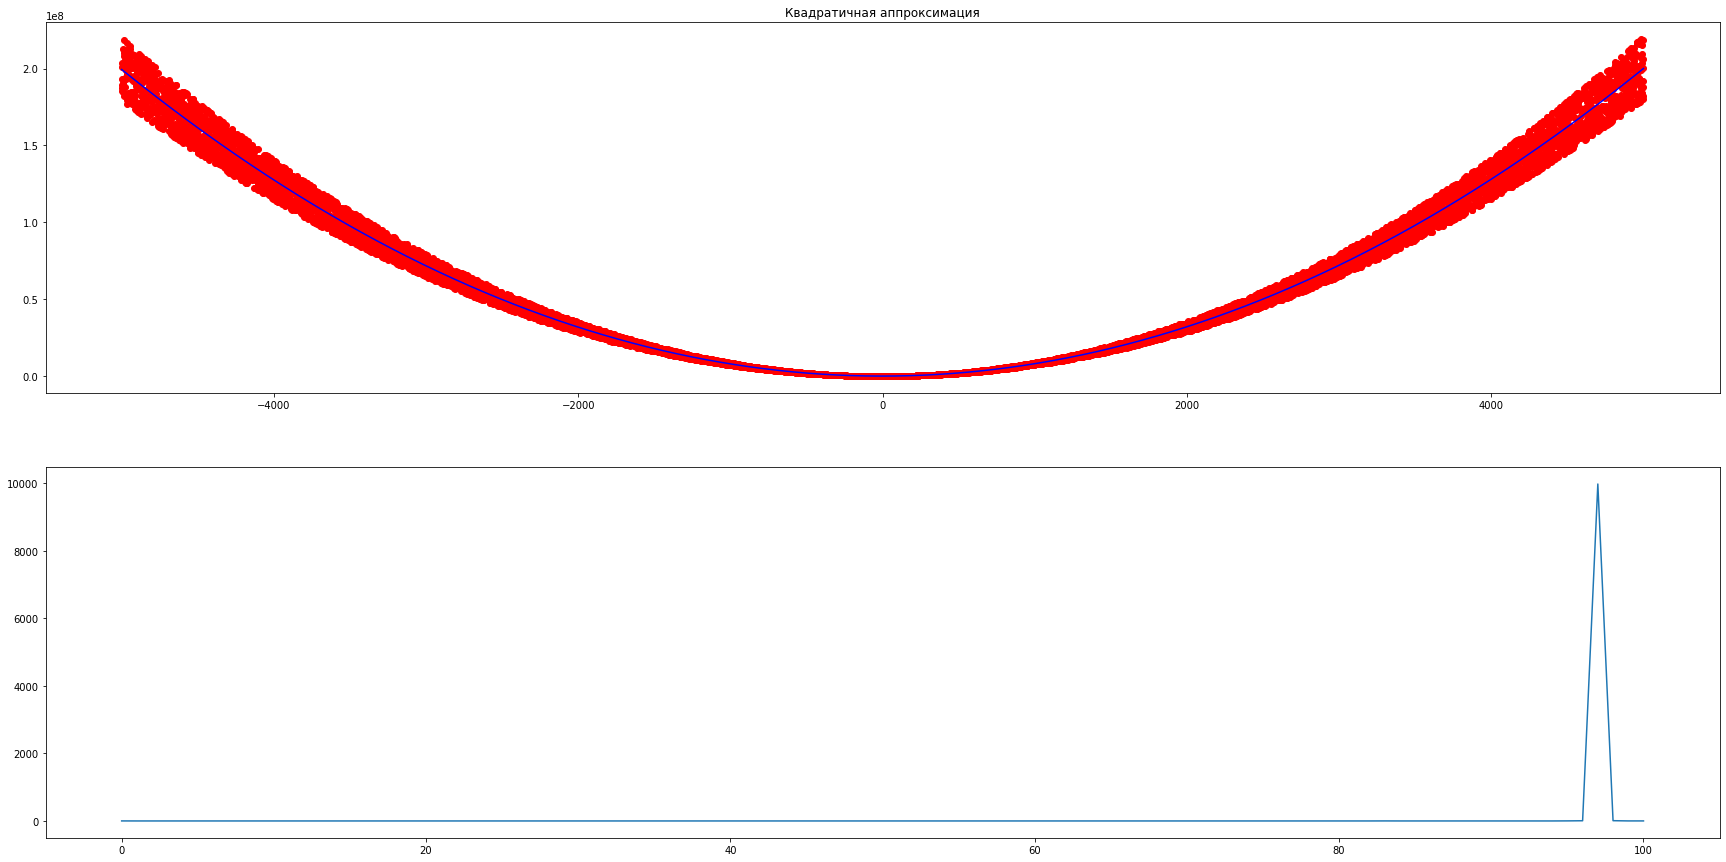

In [ ]:
fn = 'data2.csv'
plt.figure(figsize = (30, 15))
plt.subplot(2, 1, 1)

t = approx_square(fn)
t, s = t[0], t[1]
x = [el[0] for el in t]
y0 = [el[1] for el in t]
y = [el[2] for el in t]

plt.plot(x, y, c = 'b')
plt.scatter(x, y0, c = 'r')
plt.title('Квадратичная аппроксимация')

d = [(y0[i] - y[i]) / y0[i] for i in range(len(y0))]
print(d)
m = len(y0) // 100
k = (max(d) - min(d)) / m

A = [0 for i in range(m + 1)]
for el in d:
    A[int((el - min(d)) / k)] += 1

for i in range(len(A)):
    if (A[i] == 0):
        A[i] = 1e-15

plt.subplot(2, 1, 2)


plt.plot(A)

In [ ]:
fn = 'RC_F01_04_2014_T09_11_2021.csv'

In [ ]:
df = pd.read_csv(fn, sep = ';')
y0 = [float(el.replace(',', '.')) for el in df['curs']][::-1]

[0, 206, 345, 446, 510, 575, 650, 995, 1100, 1177, 1276, 1341, 1404, 1476, 1561, 1626, 1729, 1792, 1877]


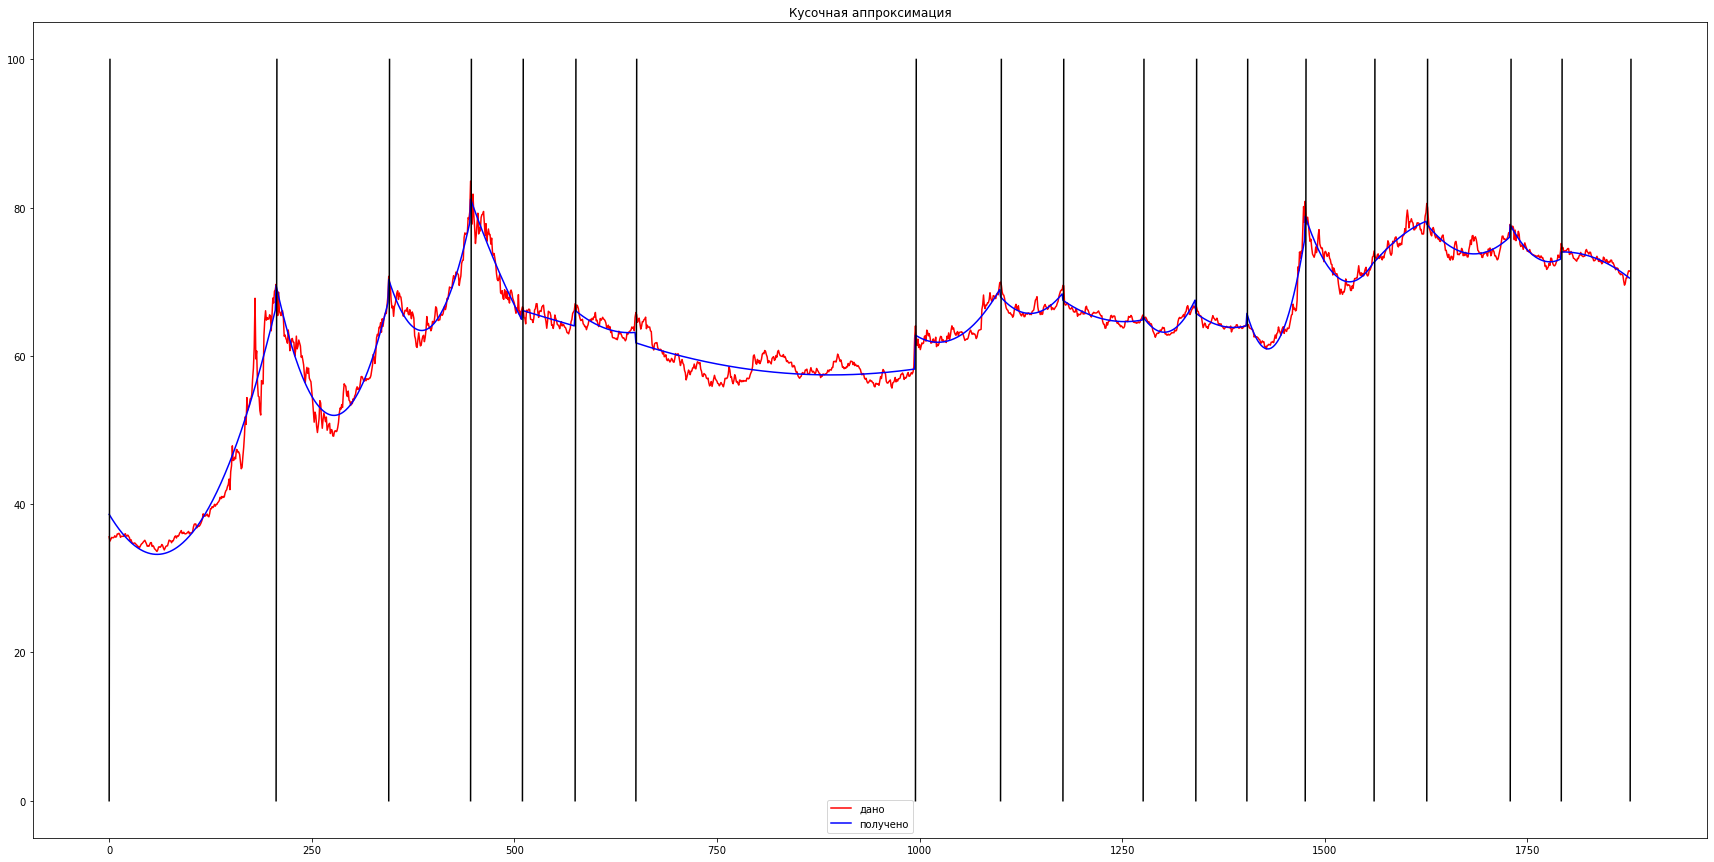

In [ ]:
plt.figure(figsize = (30, 15))
y = multiple_approx(np.arange(len(y0)), y0)
ind = y[1]
y = [el[-1] for el in y[0]]
plt.plot(y0, c = 'r')
plt.plot(y, c = 'b')

for el in ind:
    plt.plot([el, el + 1], [0, 100], c = 'k')

plt.legend(['дано', 'получено'])
plt.title('Кусочная аппроксимация')

plt.show()